In [1]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Faço o import do dataset Fashion Mnist
dataset = keras.datasets.fashion_mnist

# O load data retorna duas tuplas
tuplas_dataset = dataset.load_data()

# Então eu salvo elas separadamente
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = tuplas_dataset

# Verifico que meu dataset de treino tem 60k imagens. Com o .shape eu verifico que as dimensões são 28x28
len(imagens_treino)

# E ploto uma imagem
print(plt.imshow(imagens_treino[0]))

# Verifico o número de classificações de imagens
print(identificacoes_treino.min()) # => 0
print(identificacoes_treino.max()) # => 9
# Ou senha, tenho 10 (0 até 9)

total_de_classificacoes = 10

# Nomeio as classificações de acordo com as categorias
nomes_de_classificacoes = ['Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']


Using TensorFlow backend.


AxesImage(80,52.8;496x369.6)
0
9


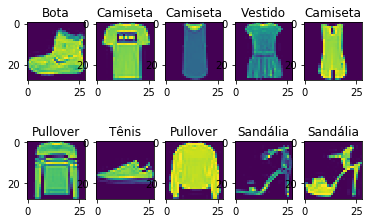

In [2]:
# Verifico e exibo todas as classificações 
for imagem in range(10):
    plt.subplot(2,5, imagem +1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

In [3]:
# Reduzo a escala de cinzas de 0-255 para 0-1, porém em ponto flutuante para manter as escalas de cinzas.
# É uma normalização para reduzir as perdas
imagens_treino = imagens_treino/255.0

In [4]:
# Crio o modelo
modelo = keras.Sequential([
    # Camada de entrada
    keras.layers.Flatten(input_shape = (28,28)), # As imagens, de 28 por 28 pixels (input_shape = tamanho das entradas).
    
    # Processamento (camada do tipo dense,
    keras.layers.Dense(256, activation = tf.nn.relu), # => Não há um número exato, ele deve ser testado e ajustado.

    # 'Adormecer' alguns itens, normalizando o modelo
    keras.layers.Dropout(0.2),
    
    # Saida
    keras.layers.Dense(10, activation = tf.nn.softmax), # => Aqui eu coloco 10 porque eu tenho 10 tipos de categorias.
])

"""
Explicar relu & softmax

relu => em suma, soma de matrizes
"""

'\nExplicar relu & softmax\n\nrelu => em suma, soma de matrizes\n'

## Parte 2 do curso: teoria e alguns testes

In [5]:
# Segunda parte do curso, teoria
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Pesos
pesos_camada_dense = modelo.layers[1].get_weights()[0]
print(pesos_camada_dense)

# Zero minha camada de pesos
pesos_camada_dense_zerados = np.zeros((784, 256))

# Camada com pesos aleatórios
pesos_camada_dense_aleatorios = np.random.rand(784, 256)



[[-0.05369237  0.01231251 -0.04848254 ... -0.0598696   0.07369877
  -0.0014319 ]
 [ 0.0100842  -0.03658826  0.00717702 ...  0.06609382  0.04499733
  -0.06577059]
 [ 0.0016521   0.06176506  0.01944596 ...  0.05632798  0.01011918
  -0.04223616]
 ...
 [ 0.03367002  0.07217829  0.05441578 ...  0.03865512 -0.07552037
   0.00709657]
 [-0.0551171  -0.01013119 -0.05097971 ... -0.02031036 -0.04666968
   0.07147866]
 [-0.05819363 -0.02684733 -0.04643153 ... -0.02295611  0.0338202
  -0.03043103]]


In [7]:
# Vieses
vieses_camada_dense = modelo.layers[1].get_weights()[1]
print(vieses_camada_dense)

vieses_camada_dense_zerados =  np.zeros((256, ))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:

# Altero o valor dos meus pesos
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados]
)

In [9]:
adam = keras.optimizers.Adam(lr=0.001)

# Antes de treinar, eu preciso compilar meu modelo
modelo.compile(
    # Otimizador
    optimizer=adam, 
    
    # Perda
    loss='sparse_categorical_crossentropy',
    
    # Contador de precisão
    metrics=['accuracy']
)

In [10]:
# Faço o treinamento do modelo passando os dados e marcações
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 4s 83us/step - loss: 2.3028 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.0995
Epoch 2/5
48000/48000 [==============================] - 4s 81us/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/5
48000/48000 [==============================] - 4s 79us/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 4/5
48000/48000 [==============================] - 4s 82us/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 5/5
48000/48000 [==============================] - 4s 79us/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0983


In [11]:
# Salvo meu modelo
modelo.save('modelo.h5')

# Dou load nele
# Coloquei o custom objects porque sem ele estava dando erro de ativação
modelo_salvo = tf.keras.models.load_model('modelo.h5', custom_objects={'softmax_v2': tf.nn.softmax})

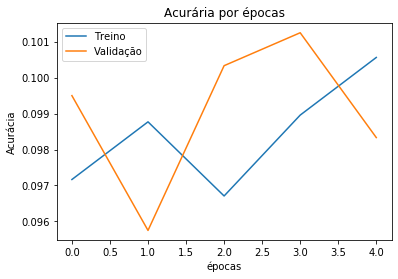

In [12]:
# Vejo e ploto a acurária do meu modelo por treino e validação
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurária por épocas')
plt.xlabel('épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

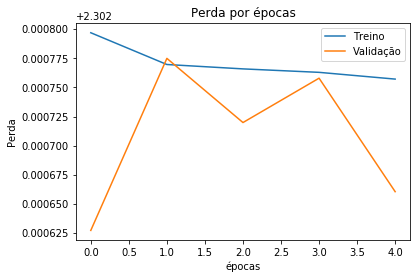

In [13]:
# Vejo e ploto a perda do meu modelo por treino e validação
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [14]:
# Testando o modelo e o modelo salvo
testes = modelo.predict(imagens_teste)
print(testes.shape, testes[1])
print(f'resultado de teste: {np.argmax(testes[1])}')
print(f'número de teste da imagem: {identificacoes_teste[1]}')

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

print(f'resultado de teste: {np.argmax(testes_modelo_salvo[1])}')
print(f'número de teste da imagem: {identificacoes_teste[1]}')

(10000, 10) [0.09869204 0.10059681 0.1004143  0.09844261 0.10084203 0.10001552
 0.09930508 0.10168053 0.10053838 0.09947271]
resultado de teste: 7
número de teste da imagem: 2
resultado de teste: 7
número de teste da imagem: 2


In [15]:
# Avaliando o modelo

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

# Faço o treinamento do modelo passando os dados e marcações
modelo.fit(imagens_treino, identificacoes_treino)

10000/10000 [==============================] - 0s 22us/step
Epoch 1/1
60000/60000 [==============================] - 4s 75us/step - loss: 2.3028 - accuracy: 0.0975


In [16]:
"""
Redes neurais;

"""

'\nRedes neurais;\n\n'

In [17]:
"""
The Vanishing Gradient Problem
"""
modelo.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Flatten',
   'config': {'name': 'flatten_1',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_1',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.2,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'